In [2]:
import numpy as np
import nm_lib as nm

from matplotlib import style
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

import importlib
style.use('dark_background')


# Riemann scheme. 

Lets consider same setup as in [ex_3a](https://github.com/AST-Course/AST5110/blob/main/ex_3a.ipynb) Burgers’ equation, i.e.,

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0   \tag{1}$$ 

for the domain $x \in (x_0, x_f)$ with $x_0 = −1.4$, $x_f = 2.0$ with initial condition:

$$u(x,t=0) = A\left[\tanh\left(\frac{x+x_c}{W}\right)-\tanh\left(\frac{x-x_c}{W}\right)\right]   \tag{2}$$

whereby $A = 0.02$ , $x_c = 0.70$, $W = 0.1$. Let the solution evolve until time $t_f = 100$. However, let's now implement a new time-step method. Find the conservative form of the equation and implement a Rieman solver [wiki:Rieman Solvers](https://github.com/AST-Course/AST5110/wiki/Riemann-solvers). 

Add this to your library and solve the previous simulation imposing the CFL condition. For this exercise, fill in `nm_lib` the function `evolv_Rie_uadv_burgers`. 

#### 1 step

Compute left and right of $u$, i.e., $u_L$ and $u_R$

#### 2 step
Compute from those the flux, i.e., $F_L$ and $F_R$

#### 3 step
Compute the propagating speed ($v_a[i]=max(|u[i],|u[i-1]|)$)

#### 4 step
Compute the interface fluxes (Rusanov)

$rhs=(F_R+F_L)/2 - v_a (U_R -U_L)$

#### 5 step
Advance in time $u^{n+1}=u^n + dt\times rhs$. What is dt? 


Is this method less or more diffusive than Lax method? Find the analytical solution and compare. Where and when is better or worse than the Lax method? 

Riemann solver
exceeded final time 1000.000 at 1000.253


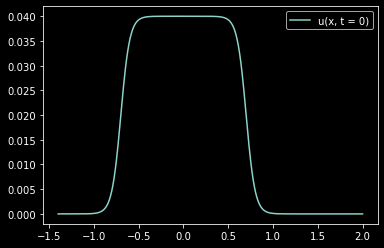

In [4]:
importlib.reload(nm)

def u_t0(xx, A, xc, W):
    return A*(np.tanh((xx+xc)/W)-np.tanh((xx-xc)/W))

x0 = -1.4
xf = 2.0
nump = 512
xx = np.linspace(start = x0, stop = xf, num = nump+1)

A=0.02
xc = 0.70
W = 0.1

u0t0 = u_t0(xx,0.02,xc,0.1)


nt = 50000
t, ut = nm.evolv_Rie_uadv_burgers(xx,u0t0,nt,tf=1000) 

nm.anim(ut,xx,t, log_time=True)

dont do tvd scheme

---
## TVD scheme. 

Combine the Lax method with the Rieman solver using a flux limiter scheme. For this, one needs to identify how large are the gradients. Lets define: 

$$r^{+}_i = \frac{u_i-u_{i-1}}{u_{i+1}+u_i}$$

What kind of properties do you see on $r^{+}_i$? e.g., what happens when $r\ge0$? or $r\le0$? 

now lets consider the following flux limiter: 

$$\phi = max\left(0,min\left(\theta r,\frac{1+r}{2},\theta \right)\right),\, \theta =[1,2]$$

Finally, combine the Lax from previous excersice with the Riemann solver using the flux limiter as follows: 

$$u^{n+1}_i = u^n_i + dt (f^n_{i+1/2}-f^n_{i-1/2})$$

Where 

$$f^n_{i+1/2} = f^{Riemann}_{i+1/2} + \phi^n_i (f^{L}_{i+1/2}-f^{Riemann}_{i+1/2})$$



When becomes purely Rieman solver? And Lax? Which others methods you can find depending on what is $r$ of $\phi$. 

NOTE: forgot to put in: flux corrected with a limited method